## Group Members:
# Zobia Khan (CS-19063)
# Muqadas Ashraf (CS-19053)


In [147]:
# Importing Libraries
import pandas as pd
import numpy as np

In [148]:
# Reading dataset
dataset=pd.read_csv("The_Grades_Dataset.csv")
dataset.describe()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [149]:
# Saving target feature in output variable
output=dataset.CGPA
output.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [150]:
# Droping those features which perform no role in target computation
courses=dataset.drop(['CGPA','Seat No.'],axis="columns")
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PH-121     571 non-null    object
 1   HS-101     571 non-null    object
 2   CY-105     570 non-null    object
 3   HS-105/12  570 non-null    object
 4   MT-111     569 non-null    object
 5   CS-105     571 non-null    object
 6   CS-106     569 non-null    object
 7   EL-102     569 non-null    object
 8   EE-119     569 non-null    object
 9   ME-107     569 non-null    object
 10  CS-107     569 non-null    object
 11  HS-205/20  566 non-null    object
 12  MT-222     566 non-null    object
 13  EE-222     564 non-null    object
 14  MT-224     564 non-null    object
 15  CS-210     564 non-null    object
 16  CS-211     566 non-null    object
 17  CS-203     566 non-null    object
 18  CS-214     565 non-null    object
 19  EE-217     565 non-null    object
 20  CS-212     565 non-null    objec

In [151]:
AssignGPs={
    "A+": 4.0,
    "A": 4.0,
    "A-" : 3.7,
    "B+" : 3.4,
    "B" : 3.0,
    "B-" : 2.7,
    "C+" : 2.4,
    "C" : 2.0,
    "C-" : 1.7,
    "D+" : 1.4,
    "D" : 1.0,
    "F" : 0.0,
    "WU" :0
}

In [152]:
# Making string values integer by assigning GPs to grades
for i in courses:
    courses[i]=courses[i].map(AssignGPs)
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [153]:
# Checking null values
courses.columns[courses.isna().any()]

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [154]:
# Filling 0 to null values
courses[0:]=courses[0:].fillna(0)

In [155]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [156]:
# Calculating grade points by multiplying grade points with credit hours
four_cd=[0,5,6,8,9,10,13,18,19,20,21,25,30,31,32,38,39]
three_cd=[2,3,4,7,12,14,15,16,22,23,26,28,33,34,37]
two_cd=[1,11,24,27,29,35,36,40]
onecd=[17]
for i in four_cd:
  courses.iloc[:, i]=courses.iloc[:, i]*4
for i in three_cd:
  courses.iloc[:, i]=courses.iloc[:, i]*3
for i in two_cd:
  courses.iloc[:, i]=courses.iloc[:, i]*2
    
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,8.0,6.8,5.1,5.1,3.4,7.4,12.0,6.8,12.0,7.4
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,4.0,5.6,3.0,6.0,2.0,7.4,8.1,8.0,8.0,6.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,14.8,12.0,9.0,12.0,4.0,8.0,12.0,16.0,14.8,8.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,6.8,5.6,6.0,4.2,3.4,5.4,9.0,9.6,9.6,4.8
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,14.8,10.8,10.2,10.2,5.4,7.4,12.0,14.8,14.8,8.0


# **MODEL 1 (First Year GPs)**


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [158]:
# Taking all first year courses in variable first_year
first_year=courses.loc[:, "PH-121":"CS-107"]

In [159]:
first_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,13.6
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,10.8
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,8.0


In [160]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_year,output,test_size=0.2)

### Linear Regression Model

In [161]:
model_lr=LinearRegression()

In [162]:
# Applying model on training data
model_lr.fit(X_train,y_train)

LinearRegression()

In [163]:
# Predicting test data through model
predictions_lr=model_lr.predict(X_test)
predictions_lr

array([1.64463476, 2.87581659, 2.70666353, 2.83469116, 3.72980608,
       3.45670639, 3.27363368, 3.41738283, 2.6788963 , 3.09604281,
       1.85828552, 1.92526721, 2.09377471, 2.89703199, 2.53079851,
       3.09504666, 2.88448777, 2.73961544, 1.91388923, 3.6773251 ,
       2.44381849, 1.90170921, 2.77280197, 3.68373658, 2.4787109 ,
       3.15768271, 2.97921002, 3.48391682, 3.22273846, 3.72489433,
       3.48955871, 2.74489094, 2.99168532, 2.60592889, 2.83871295,
       3.2677793 , 3.78975368, 3.75672039, 3.83042947, 3.60820088,
       2.51550425, 1.8424761 , 3.63196275, 2.58342895, 2.44428073,
       2.75476052, 3.24280549, 3.04519997, 3.64517993, 2.29709194,
       3.56873079, 3.7483507 , 2.30632406, 3.50759136, 2.18068637,
       2.92736532, 3.56848882, 2.88257833, 2.07160618, 3.00500263,
       1.8387696 , 2.77477381, 1.79468616, 3.19688675, 2.51839796,
       2.67012665, 3.62727511, 2.1316085 , 2.47782032, 2.41475229,
       1.85815236, 2.63848212, 2.61782429, 2.0848505 , 3.24619

###Evaluating The Model

In [164]:
# Calculating RMSE 
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_lr)
rmse=np.sqrt(mse)
rmse

0.23959651793224274

In [165]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
results=[]
cross_value=cross_val_score(model_lr, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.79604414, 0.8547546 , 0.82810244, 0.93790172, 0.87862148,
       0.71760142, 0.88590354, 0.91587426, 0.76006024, 0.76013576])

In [166]:
# Claculating accuracy
model_lr.score(X_test,y_test)

0.8665225754336151

### Support Vector Machine

In [167]:
# Importing support vector regression model
from sklearn.svm import SVR 
model_svr=SVR()

In [168]:
# Applying model on training data
model_svr.fit(X_train,y_train)

SVR()

In [169]:
# Prediction on test data 
predictions_svr=model_svr.predict(X_test)
predictions_svr

array([1.62668184, 3.14274948, 2.58702204, 2.60888277, 3.75390712,
       3.59754493, 3.40710211, 3.4840741 , 2.49533094, 3.0554066 ,
       1.84659432, 1.73071995, 2.19342642, 2.71617506, 2.50150615,
       3.02027686, 3.00748352, 2.63237216, 2.03194605, 3.79392667,
       2.41756971, 1.7831867 , 2.70700538, 3.62161319, 2.53109033,
       3.2445302 , 3.19732567, 3.47654979, 3.23873141, 3.72014865,
       3.5471067 , 2.82963935, 2.94392831, 2.6911785 , 2.76053363,
       3.28192536, 3.86298803, 3.8408007 , 3.86108719, 3.6945159 ,
       2.40274798, 1.9210078 , 3.72655953, 2.52337706, 2.36721723,
       2.80459019, 3.19728883, 3.02603885, 3.50285938, 2.16463324,
       3.62886576, 3.80307502, 2.4049355 , 3.6452062 , 2.31244389,
       2.84928776, 3.69747353, 2.80145993, 2.10519107, 3.05297961,
       1.72302057, 3.01781959, 1.73888264, 3.24443115, 2.32856393,
       2.68125668, 3.60141904, 2.11379667, 2.74584118, 2.4094262 ,
       1.8602265 , 2.50809611, 2.51651778, 1.95969106, 3.14855

In [170]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_svr)
rmse=np.sqrt(mse)
rmse

0.237430147443318

In [171]:
# Calculating Accuracy of SVR model
model_svr.score(X_test,y_test)

0.8689254007631739

In [172]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(model_svr, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.82708451, 0.84246689, 0.83687614, 0.95619739, 0.88885632,
       0.86426264, 0.85073803, 0.94007512, 0.56090405, 0.84140471])

# **MODEL 2 (Two year GPs)**

In [173]:
# Saving first year and second year courses in variable seccond_year
second_year=courses.loc[:, "PH-121":"CS-215"]

In [174]:
second_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,3.0,14.8,8.1,7.2,4.2,1.4,4.0,16.0,4.0,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,8.1,6.8,4.2,4.2,3.0,2.0,4.0,10.8,8.0,4.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,12.0,16.0,12.0,12.0,12.0,4.0,14.8,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,4.2,10.8,3.0,6.0,10.2,2.4,4.0,5.6,4.0,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,12.0,14.8,11.1,11.1,8.1,4.0,14.8,16.0,14.8,14.8


In [175]:
# Splitting trainin and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(second_year,output,test_size=0.2)

### Linear Regression

In [176]:
model_lr2=LinearRegression()

In [177]:
# Applying model on training data
model_lr2.fit(X_train,y_train)

LinearRegression()

In [178]:
# Predictions on test data
predictions_lr2=model_lr2.predict(X_test)
predictions_lr2

array([2.94053604, 1.81597708, 2.29915908, 2.60999207, 3.54185362,
       2.63908724, 3.51593574, 3.241258  , 3.49407298, 3.11804056,
       2.55442449, 3.10310354, 3.29780809, 1.99811368, 3.65029973,
       3.63552034, 3.01195646, 2.31731507, 2.54107453, 2.59304951,
       2.97652603, 3.57914401, 3.20035932, 2.69815884, 2.15816189,
       2.87066609, 2.96337796, 3.61501837, 3.08120763, 3.34521844,
       3.3054334 , 2.88449817, 3.68542329, 2.21690329, 3.74120006,
       2.90041779, 3.4175157 , 3.52006574, 2.65533777, 3.3951112 ,
       1.88703156, 2.41693147, 3.57674473, 3.68799546, 2.58504809,
       3.65614741, 0.99835165, 3.87365556, 3.14152231, 2.30467749,
       3.38441957, 3.17798462, 1.45056979, 3.65446156, 3.83880526,
       3.7616319 , 3.35628661, 0.8050115 , 3.81820321, 2.8341773 ,
       3.48985287, 2.88698502, 3.53510951, 2.9942917 , 3.64852184,
       2.88632786, 0.99043905, 2.16946698, 2.67393442, 2.99386672,
       2.9026178 , 2.94739662, 3.66106459, 3.4842296 , 3.18101

In [179]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_lr2)
rmse=np.sqrt(mse)
rmse

0.17660135226100745

In [180]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(model_lr2, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.92465459, 0.8350078 , 0.96592461, 0.96979949, 0.62875054,
       0.86697003, 0.84177536, 0.86278574, 0.79821965, 0.91055148])

In [181]:
# Calculating Accuracy of the model
model_lr2.score(X_test,y_test)

0.9137220502245559

### Support Vector Machine

In [182]:
from sklearn.svm import SVR 
model_svr2=SVR()

In [183]:
# Applying model on training data
model_svr2.fit(X_train,y_train)

SVR()

In [184]:
# Predictions on test data
predictions_svr2 = model_svr2.predict(X_test)
predictions_svr2


array([2.90005501, 1.90147519, 2.27572772, 2.57775303, 3.51247045,
       2.70012625, 3.50799381, 3.28842115, 3.56220959, 3.26315212,
       2.62325705, 3.02451551, 3.31565257, 1.82249022, 3.58837454,
       3.56808456, 3.1767381 , 2.32046383, 2.37217371, 2.46926451,
       2.96822929, 3.51661532, 3.03784273, 2.54825   , 2.05867718,
       3.02819498, 2.88339647, 3.46704016, 3.0052459 , 3.30197908,
       3.22687917, 2.88248494, 3.71956863, 2.41871631, 3.72358369,
       2.84109475, 3.35913651, 3.22115912, 2.46134593, 3.37378268,
       1.97217503, 2.47235182, 3.49446421, 3.67181605, 2.51223822,
       3.57766236, 1.51085408, 3.89005479, 3.04571126, 2.28066258,
       3.47839288, 3.22364754, 2.59950821, 3.6377754 , 3.82764439,
       3.64410916, 3.40608298, 1.29257276, 3.85287619, 2.78417592,
       3.48133963, 3.14464421, 3.46873989, 2.92306337, 3.71611469,
       2.87072729, 1.53502967, 1.98509455, 2.77905014, 3.07850422,
       2.95146675, 2.846678  , 3.53355608, 3.33961014, 3.17912

In [185]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_svr2)
rmse=np.sqrt(mse)
rmse

0.1444471376273194

In [186]:
# Calculating accuracy of the model
model_svr2.score(X_test,y_test)

0.9422795580762688

In [187]:
# Test data is cross validated with CV value 10 which returns the array of scores
from sklearn.model_selection import cross_val_score
cross_value=cross_val_score(model_svr2, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.93483495, 0.92493946, 0.95355396, 0.91980033, 0.95588019,
       0.91430618, 0.87653091, 0.91114351, 0.9056238 , 0.9412317 ])

# **MODEL 3(Three Year GPs)**

In [216]:
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,MT-442,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,6.8,5.1,10.2,5.1,3.4,7.4,12.0,6.8,12.0,7.4
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,5.6,3.0,5.1,6.0,2.0,7.4,8.1,8.0,8.0,6.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,12.0,9.0,12.0,12.0,4.0,8.0,12.0,16.0,14.8,8.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,5.6,6.0,5.1,4.2,3.4,5.4,9.0,9.6,9.6,4.8
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,10.8,10.2,11.1,10.2,5.4,7.4,12.0,14.8,14.8,8.0


In [188]:
column_to_move = courses.pop("MT-442")
courses.insert(33, "MT-442", column_to_move)

In [189]:
# Saving courses from first year to third year in variable Third_year
Third_year=courses.loc[:, "PH-121":"CS-317"]

In [190]:
Third_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,5.1,4.8,12.0,6.0,4.8,4.0,6.8,8.0,6.8,5.1
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,3.0,3.4,14.8,4.2,3.4,4.0,14.8,4.0,5.6,3.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,7.2,8.0,13.6,11.1,6.0,6.8,14.8,14.8,12.0,9.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,3.0,5.4,4.0,8.1,2.8,2.8,13.6,6.8,5.6,6.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,5.1,7.4,10.8,11.1,4.8,7.4,10.8,14.8,10.8,10.2


In [191]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(Third_year,output,test_size=0.2)

### Linear Regression

In [192]:
model_lr3=LinearRegression()

In [193]:
# Applying model on training data
model_lr3.fit(X_train,y_train)

LinearRegression()

In [194]:
# Predictions on test data
predictions_lr3=model_lr3.predict(X_test)
predictions_lr3

array([2.95302764, 3.07657607, 2.96169574, 3.66829019, 3.41796481,
       3.0936881 , 2.79270613, 3.39844256, 2.63480799, 3.63340243,
       2.94626803, 2.18381082, 2.67657331, 3.32673796, 1.58344047,
       3.09927045, 2.90065178, 1.964498  , 3.65554908, 3.5421527 ,
       0.70214002, 3.67520706, 2.66900497, 3.10716278, 3.34485273,
       3.03253195, 3.28056494, 2.04564215, 3.35957783, 1.94542564,
       2.88851774, 3.38165774, 2.83937257, 3.10485531, 2.76714113,
       3.10255651, 3.28553684, 3.77707972, 2.94316558, 2.64813578,
       3.51693465, 3.21416343, 3.0367634 , 3.48858328, 2.86814667,
       2.99350952, 3.65442362, 3.7878293 , 1.84779994, 3.1708608 ,
       3.64941748, 2.92363077, 3.79543898, 2.91878304, 3.91895732,
       1.77791011, 2.71915927, 3.06933379, 3.53082128, 3.73226812,
       0.78802713, 1.89705737, 2.62003789, 2.64373265, 3.25514124,
       3.0589989 , 2.10211862, 2.29600786, 2.61744604, 3.05073308,
       3.94464488, 2.5342842 , 3.41038683, 2.77179227, 3.59726

In [195]:
# Calculating RMSE
mse=mean_squared_error(y_test,predictions_lr3)
rmse=np.sqrt(mse)
rmse

0.1376384286187093

In [196]:
# Test data is cross validated with CV value 10 which returns the array of scores
cross_value=cross_val_score(model_lr3, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.94934833, 0.92763983, 0.95851449, 0.91028338, 0.98645712,
       0.94599168, 0.84031351, 0.96537785, 0.90547145, 0.94057057])

In [197]:
# Calculating accuracy of the model
model_lr3.score(X_test,y_test)

0.9549267927219913

### Support Vector Regression

In [198]:
model_svr3=SVR()

In [199]:
# Applying model on training data
model_svr3.fit(X_train,y_train)

SVR()

In [200]:
# Predictions on test data 
predictions_svr3 = model_svr3.predict(X_test)
predictions_svr3


array([3.01997031, 2.87417849, 3.00724783, 3.72052996, 3.35625412,
       3.0505971 , 2.68112678, 3.39165316, 2.66864234, 3.56851066,
       2.98236482, 2.07954281, 2.63370332, 3.33074836, 2.04793389,
       2.86892546, 2.86760983, 1.84589012, 3.65202498, 3.59031234,
       1.37593401, 3.74045916, 2.62335381, 2.91876569, 3.43254088,
       2.90187779, 3.19366593, 1.95104658, 3.38281368, 2.0554272 ,
       2.79703131, 3.28625317, 2.9591102 , 2.9997539 , 2.72401036,
       3.01986249, 3.29028963, 3.76553659, 2.86783464, 2.6783511 ,
       3.66542449, 3.19858277, 3.15921808, 3.4779318 , 2.83193989,
       2.84735961, 3.63236268, 3.7998765 , 1.73511133, 3.26644469,
       3.68232573, 2.96720804, 3.83491476, 3.00546588, 3.86851333,
       2.09888999, 2.66755222, 2.92567443, 3.57898484, 3.75424585,
       1.44967332, 2.07257094, 2.61145506, 2.74859458, 3.37766456,
       3.13389544, 2.06692651, 2.09441248, 2.57379724, 2.80327615,
       3.8563149 , 2.39541799, 3.18532747, 2.49482029, 3.70982

In [201]:
# Calculating RMSE
mse=mean_squared_error(y_test,predictions_svr3)
rmse=np.sqrt(mse)
rmse

0.10196105340854059

In [202]:
# Calculating accuracy of the model
model_svr3.score(X_test,y_test)

0.9752652412838204

In [203]:
# Test data is cross validated with CV value 10 which returns the array of scores
cross_value=cross_val_score(model_svr3, X_test,y_test,cv=10)
results.append(cross_value)
cross_value

array([0.97325097, 0.98244946, 0.98106464, 0.94525264, 0.9801226 ,
       0.97290671, 0.97304963, 0.97687717, 0.97194025, 0.97097543])

# Graphical Comparison of Models

In [204]:
# Making list of models 
models=[('LR1',model_lr),('LR2',model_lr2),('LR3',model_lr3),('SVR1',model_svr),('SVR2',model_svr2),('SVR3',model_svr3)]

In [205]:
models

[('LR1', LinearRegression()),
 ('LR2', LinearRegression()),
 ('LR3', LinearRegression()),
 ('SVR1', SVR()),
 ('SVR2', SVR()),
 ('SVR3', SVR())]

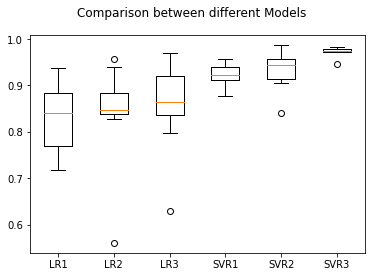

In [206]:
names = [] #Variable used to fetch names of the models in list of models
for name, model in models:
	names.append(name)

# boxplot of algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different Models')
ax = fig.add_subplot(111) # a graph of 1x1
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [207]:
! pip install gradio #Library used to create UI 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
import gradio as gr

In [209]:
def model_1(PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106,
       EL_102, EE_119, ME_107, CS_107):
  #locals.values fetch the arguments passed in function, then converted to list then numpy array
  attributes = np.array(list(locals().values())).reshape(1,-1) 
  #array converted to dataframe in order to pre-process data fetched from user
  attributes = pd.DataFrame(attributes)
  #Assigning GPs to grades
  for i in range(0,11):
    attributes[i]=attributes[i].map(AssignGPs)
  #Multiplying GPs with credit hours
  four_cd=[0,5,6,8,9,10]
  three_cd=[2,3,4,7]
  two_cd=[1]
  for i in four_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*4
  for i in three_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*3
  for i in two_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*2
  #data fetched from user are predicted using Support Vector Regressor model of First year
  predictions_model1 =  model_svr.predict(attributes)
  return predictions_model1

In [210]:
def model_2(PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106,
       EL_102, EE_119, ME_107, CS_107, HS_205_20, MT_222, EE_222,
       MT_224, CS_210, CS_211, CS_203, CS_214, EE_217, CS_212,
       CS_215):
  #locals.values fetch the arguments passed in function, then converted to list then numpy array
  attributes = np.array(list(locals().values())).reshape(1,-1)
  #array converted to dataframe in order to pre-process data fetched from user
  attributes = pd.DataFrame(attributes)
  #Assigning GPs to grades
  for i in range(0,22):
    attributes[i]=attributes[i].map(AssignGPs)
  #Multiplying GPs with credit hours
  four_cd=[0,5,6,8,9,10,13,18,19,20,21]
  three_cd=[2,3,4,7,12,14,15,16]
  two_cd=[1,11]
  for i in four_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*4
  for i in three_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*3
  for i in two_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*2
  #data fetched from user are predicted using Support Vector Regressor model of Second year
  predictions_model2 =  model_svr2.predict(attributes)
  return predictions_model2

In [214]:
def model_3(PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106,
       EL_102, EE_119, ME_107, CS_107, HS_205_20, MT_222, EE_222,
       MT_224, CS_210, CS_211, CS_203, CS_214, EE_217, CS_212,
       CS_215, MT_331, EF_303, HS_304, CS_301, CS_302, TC_383, EL_332, CS_318, CS_306, CS_312, CS_317):
  #locals.values fetch the arguments passed in function, then converted to list then numpy array
  attributes = np.array(list(locals().values())).reshape(1,-1)
  #array converted to dataframe in order to pre-process data fetched from user
  attributes = pd.DataFrame(attributes)
  #Assigning GPs to grades
  for i in range(0,33):
    attributes[i]=attributes[i].map(AssignGPs)
  #Multiplying GPs with credit hours
  four_cd=[0,5,6,8,9,10,13,18,19,20,21,24,28,29,32]
  three_cd=[2,3,4,7,12,14,15,16,23,26,27,30]
  two_cd=[1,11,22,25,31]
  for i in four_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*4
  for i in three_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*3
  for i in two_cd:
    attributes.iloc[:, i]=attributes.iloc[:, i]*2
  #data fetched from user are predicted using Support Vector Regressor model of Third year
  predictions_model3 =  model_svr3.predict(attributes)
  return predictions_model3

In [215]:
demo = gr.Blocks()
with demo:
    gr.Markdown("Prediction of CGPA using Machine Learning Models.")
    with gr.Tabs():
        with gr.TabItem("One Year Model"):
          #UI for First year
          gr.Interface(fn=model_1,inputs=['text','text','text','text','text','text','text','text','text','text','text'],outputs='text')#11 courses data is taken from user in the form of grades
          #UI for Second year
        with gr.TabItem("Two Years Model"):
          gr.Interface(fn=model_2,inputs=['text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text'],outputs='text')#22 courses data is taken from user in the form of grades
          #UI for Third year
        with gr.TabItem("Three Years Model"):
          gr.Interface(fn=model_3,inputs=['text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text','text'],outputs='text')#33 courses data is taken from userin the form of grades

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://47570.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2202048150>,
 'http://127.0.0.1:7865/',
 'https://47570.gradio.app')